In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
salary = pd.read_csv('../data/salary.csv')
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [80]:
salary.shape

(514, 11)

In [81]:
x_salary = salary.drop('salary', axis='columns')
x_salary.head()

,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,0,0,0,1.17,1,0,1,1,3,0
1,1,0,0,1.24,1,0,1,1,2,0
2,0,0,0,1.21,1,0,1,1,3,2
3,0,2,1,0.99,1,0,1,1,4,1
4,0,2,2,0.91,1,0,1,1,4,1


In [82]:
y_salary = salary['salary']
y_salary.head()

0    53000.0
1    58000.0
2    45500.0
3    35782.0
4    34731.0
Name: salary, dtype: float64

In [83]:
x_salary_train, x_salary_test, y_salary_train, y_salary_test= train_test_split(x_salary,y_salary, test_size=0.20, random_state=33)

In [84]:
salary_train_df = pd.concat([y_salary_train,x_salary_train], axis = 1)


In [90]:
salary_train_df.head()
salary_train_df.shape
salary_train_df = salary_train_df[salary_train_df['yearsworked']> 0]

salary_train_df['salary/yearsworked'] = salary_train_df['salary']/(salary_train_df['yearsworked'])

In [91]:
salary_train_df.dropna(inplace=True)

In [92]:
Q1_salary = salary_train_df['salary/yearsworked'].quantile(0.25)
Q3_salary = salary_train_df['salary/yearsworked'].quantile(0.75)
IQR_salary= Q3_salary - Q1_salary



In [93]:
salary_lower_limit = Q1_salary - 1.5*IQR_salary
salary_upper_limit = Q3_salary + 1.5*IQR_salary


salary_train_df = salary_train_df[(salary_train_df['salary/yearsworked']>salary_lower_limit)&(salary_train_df['salary/yearsworked']<salary_upper_limit)]
salary_train_df.shape

(340, 12)

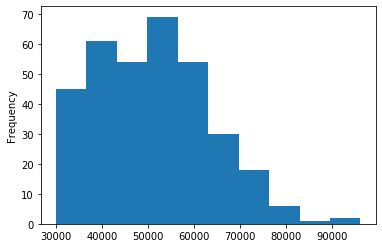

In [94]:
salary_train_df['salary'].plot.hist()

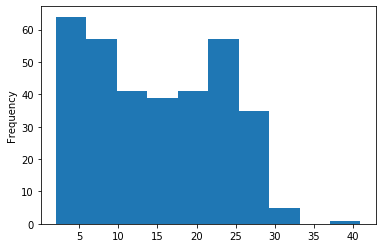

In [95]:
salary_train_df['yearsworked'].plot.hist()

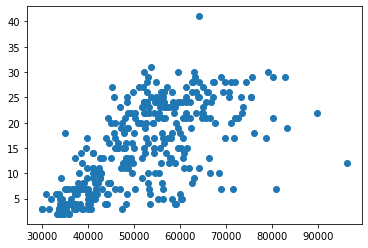

In [96]:
plt.scatter(salary_train_df['salary'],salary_train_df['yearsworked'])

In [97]:
clean_x_salary = salary_train_df['yearsworked']
clean_y_salary = salary_train_df['salary']

In [98]:
X_salary = sm.add_constant(clean_x_salary) # adding a constant
model = sm.OLS(clean_y_salary, X_salary).fit()
predictions = model.predict(X_salary) 

In [99]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     261.2
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           6.14e-44
Time:                        06:07:10   Log-Likelihood:                -3588.0
No. Observations:                 340   AIC:                             7180.
Df Residuals:                     338   BIC:                             7188.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.734e+04   1005.797     37.124      